In [1]:
# some imports

import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets

In [2]:
import network_hhw as nhw

In [3]:
# loads the trainset and testset

data_transform = nhw.data_transform

trainset = datasets.ImageFolder(root='hhw_dataset/TRAIN',
                                           transform=data_transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=4)

testset = datasets.ImageFolder(root='hhw_dataset/TEST',
                                           transform=data_transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                          shuffle=True, num_workers=4)

In [4]:
# creates the neural network

net = nhw.Net()

In [5]:
# loss and optimizer functions

import torch.optim as optim
import torch.nn as nn

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [6]:
# trains the model

for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 10 == 9:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 10))
            running_loss = 0.0

print('Finished Training')

[1,    10] loss: 1.068
[1,    20] loss: 1.044
[2,    10] loss: 1.014
[2,    20] loss: 0.897
[3,    10] loss: 0.676
[3,    20] loss: 0.504
[4,    10] loss: 0.362
[4,    20] loss: 0.258
[5,    10] loss: 0.295
[5,    20] loss: 0.232
[6,    10] loss: 0.171
[6,    20] loss: 0.033
[7,    10] loss: 0.112
[7,    20] loss: 0.046
[8,    10] loss: 0.037
[8,    20] loss: 0.025
[9,    10] loss: 0.013
[9,    20] loss: 0.013
[10,    10] loss: 0.005
[10,    20] loss: 0.005
Finished Training


In [7]:
# path to save the model

PATH = './models/model004.pth'

In [8]:
torch.save(net.state_dict(), PATH)

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image

def imshow(img):
    #img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


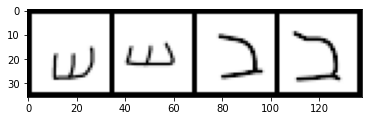

GroundTruth:   shin  shin   bet   bet


In [10]:
# gets random images and their labels

dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % nhw.classes[labels[j]] for j in range(4)))

In [11]:
# loads the model from the given path

net = nhw.Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [12]:
outputs = net(images)

In [13]:
# prints the predicted letters

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % nhw.classes[predicted[j]]
                              for j in range(4)))

Predicted:   shin  shin   bet   bet


In [14]:
# estimates the accuracy of the model in general

correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the test images: 98 %


In [15]:
# estimates the accuracy of each letter

class_correct = list(0. for i in range(nhw.qtd_classes))
class_total = list(0. for i in range(nhw.qtd_classes))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(len(labels)):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(nhw.qtd_classes):
    print('Accuracy of %5s : %2d %%' % (
        nhw.classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of   bet : 96 %
Accuracy of dalet : 100 %
Accuracy of  shin : 100 %
